<a href="https://colab.research.google.com/github/dsmukti/mukticapstone/blob/main/MuktiVerma_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

### Given data set is for the telecom company to find out the reason for the customer churn. so first of all we will analyze the data & variable characteristics & then will try to find the reason behind the churn by analyzing the variation of these variables with respect to churn status.

### ***First of all importing all the libraries !!***

# **Importing Libraries**

In [ ]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Importing dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_tc= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA/Telecom Churn.csv')

# **Data Sanity checking**



### Before i start the data analysis i would like to check the Data Frame, what all features are there ,if there are many features we can also drop some if necessary,that saves time

In [ ]:

df_tc.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df_tc.shape

(3333, 20)

There are 3333 rows and 20 columns in the set.

In [ ]:
print('Number of rows i.e. customers in given dataset is: \033[1m',df_tc.shape[0],'\n\033[0mNumber of columns i.e. features in given dataset is: \033[1m',df_tc.shape[1])

Number of rows i.e. customers in given dataset is:  3333 
Number of columns i.e. features in given dataset is:  20


### Next i am going to check for the null value , that may mislead the analysis.
### As its already given "its cleaned customer activity data " so i am using isnull()..other wise we can use dropna() method ,which will directly remove all the rows/columns consisting null values.

In [ ]:
#check for the null values
df_tc.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**There is no null value in the given dataset**

In [ ]:
df_tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df_tc['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
df_tc['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df_tc['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_tc['Churn'].unique()

array([False,  True])

In [ ]:
df_tc['Area code'].unique()

array([415, 408, 510])

In [ ]:
df_tc['Area code'].dtypes

dtype('int64')

**Area code is classified as numerical variable, however from the values & by subject knowledge area code should be a categorical variable**

# **Changing Area code datatype**

In [ ]:
df_tc['Area code']=df_tc['Area code'].astype('object')

In [ ]:
df_tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   object 
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
num=['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

cat=['State','Area code', 'International plan','Voice mail plan','Churn']

## **Exploratory Data Analysis**

### **Univariate Analysis**

**Summary of the dataset**

In [ ]:
#restricting the values to display up to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#Check the data summary
df_tc.describe().T

count   mean   std   min    25%    50%    75%    max
Account length         3333.00 101.06 39.82  1.00  74.00 101.00 127.00 243.00
Number vmail messages  3333.00   8.10 13.69  0.00   0.00   0.00  20.00  51.00
Total day minutes      3333.00 179.78 54.47  0.00 143.70 179.40 216.40 350.80
Total day calls        3333.00 100.44 20.07  0.00  87.00 101.00 114.00 165.00
Total day charge       3333.00  30.56  9.26  0.00  24.43  30.50  36.79  59.64
Total eve minutes      3333.00 200.98 50.71  0.00 166.60 201.40 235.30 363.70
Total eve calls        3333.00 100.11 19.92  0.00  87.00 100.00 114.00 170.00
Total eve charge       3333.00  17.08  4.31  0.00  14.16  17.12  20.00  30.91
Total night minutes    3333.00 200.87 50.57 23.20 167.00 201.20 235.30 395.00
Total night calls      3333.00 100.11 19.57 33.00  87.00 100.00 113.00 175.00
Total night charge     3333.00   9.04  2.28  1.04   7.52   9.05  10.59  17.77
Total intl minutes     3333.00  10.24  2.79  0.00   8.50  10.30  12.10  20.00
Total intl calls       3333.00   4.48  2.46  0.00   3.00   4.00   6.00  20.00
Total intl charge      3333.00   2.76  0.75  0.00   2.30   2.78   3.27   5.40
Customer service calls 3333.00   1.56  1.32  0.00   1.00   1.00   2.00   9.00

In [ ]:
df_tc.describe(include=object).T

count unique  top  freq
State               3333     51   WV   106
Area code           3333      3  415  1655
International plan  3333      2   No  3010
Voice mail plan     3333      2   No  2411

In [ ]:
print('% of customers not opted for international plan: \033[1m',round(3010/3333*100,2),'%','\n\033[0m% of customers not opted for voice plan: \033[1m',round(2411/3333*100,2),'%')

% of customers not opted for international plan:  90.31 % 
% of customers not opted for voice plan:  72.34 %


**Boxplot to check outliers of numerical variables in the dataset**

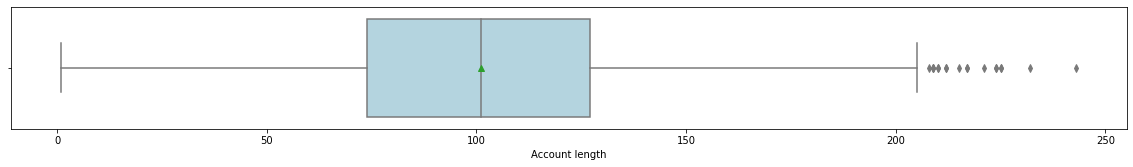

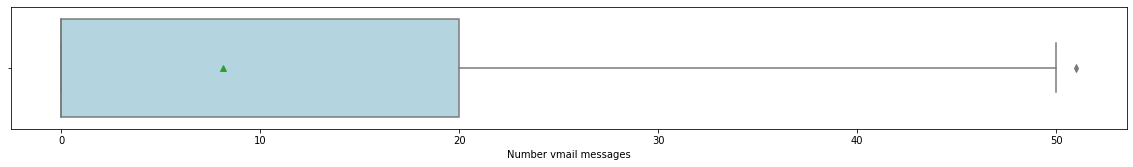

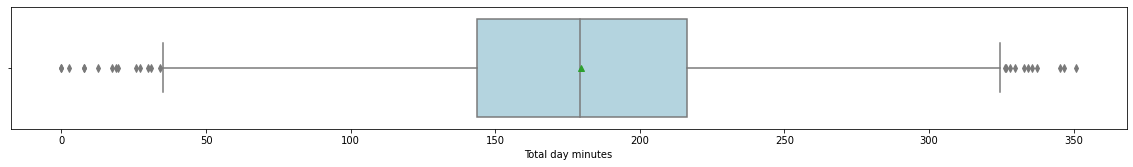

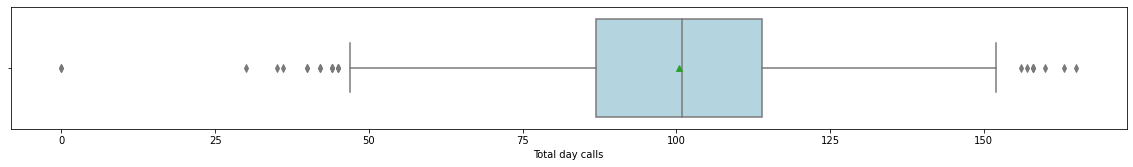

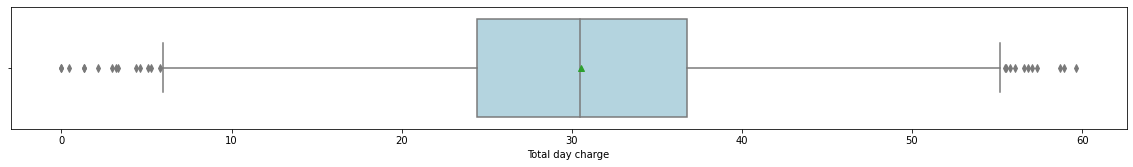

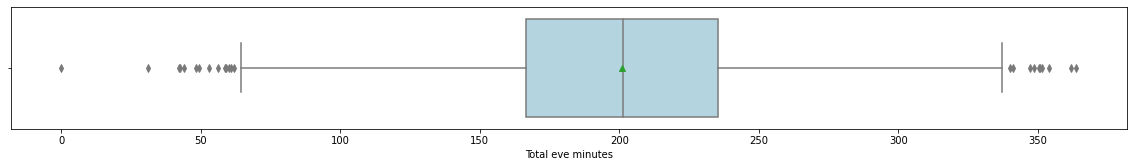

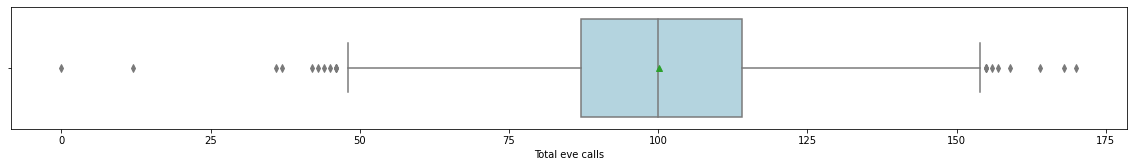

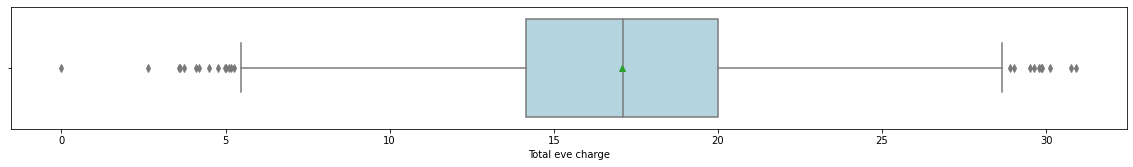

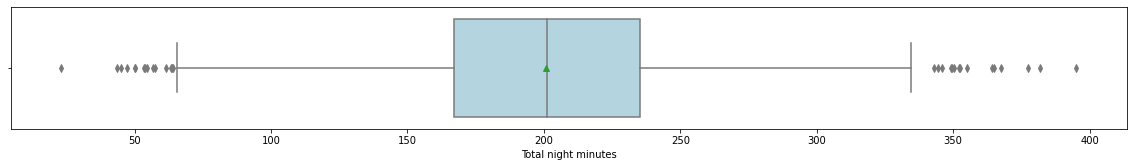

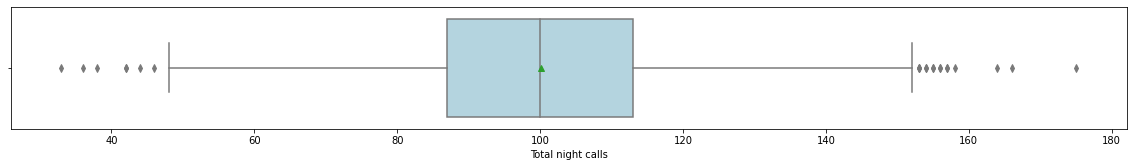

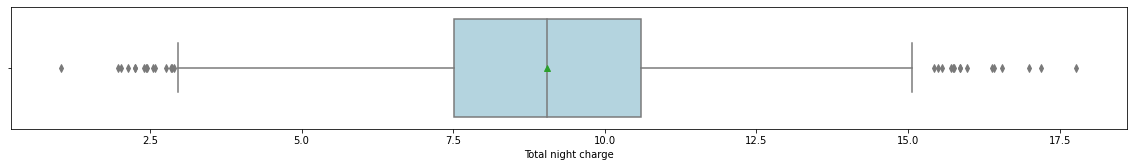

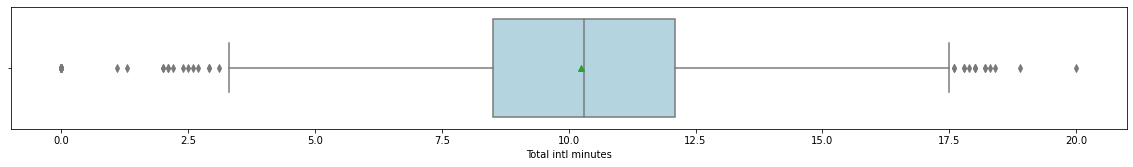

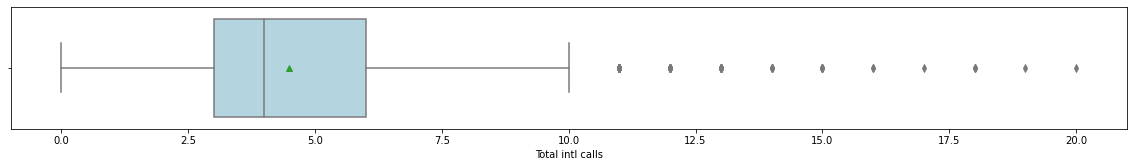

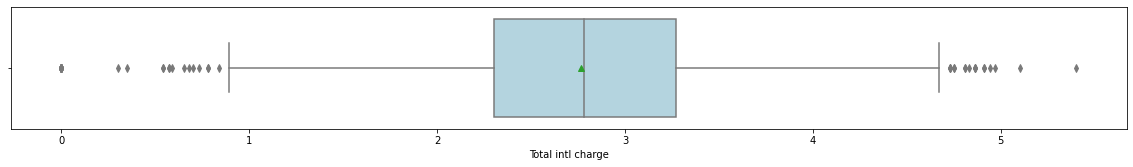

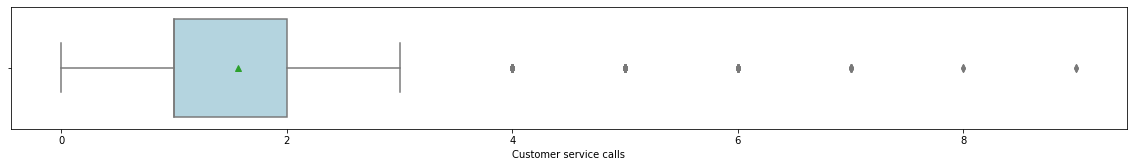

In [ ]:
i=0
for col in num:
  i=i+1
  plt.figure(figsize= (20,40))
  plt.subplot(15,1,i)
  sns.boxplot(df_tc[col],showmeans=True, color='lightblue');

**Countplot for categorical variables in the dataset**

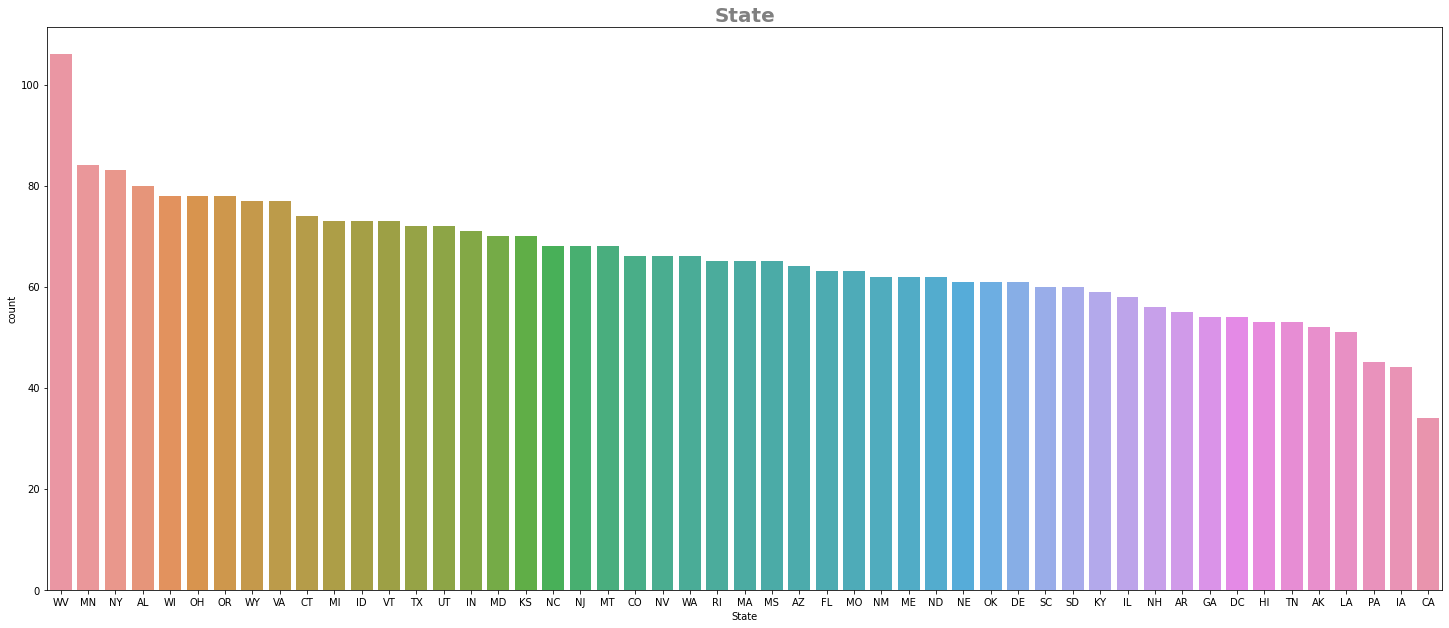

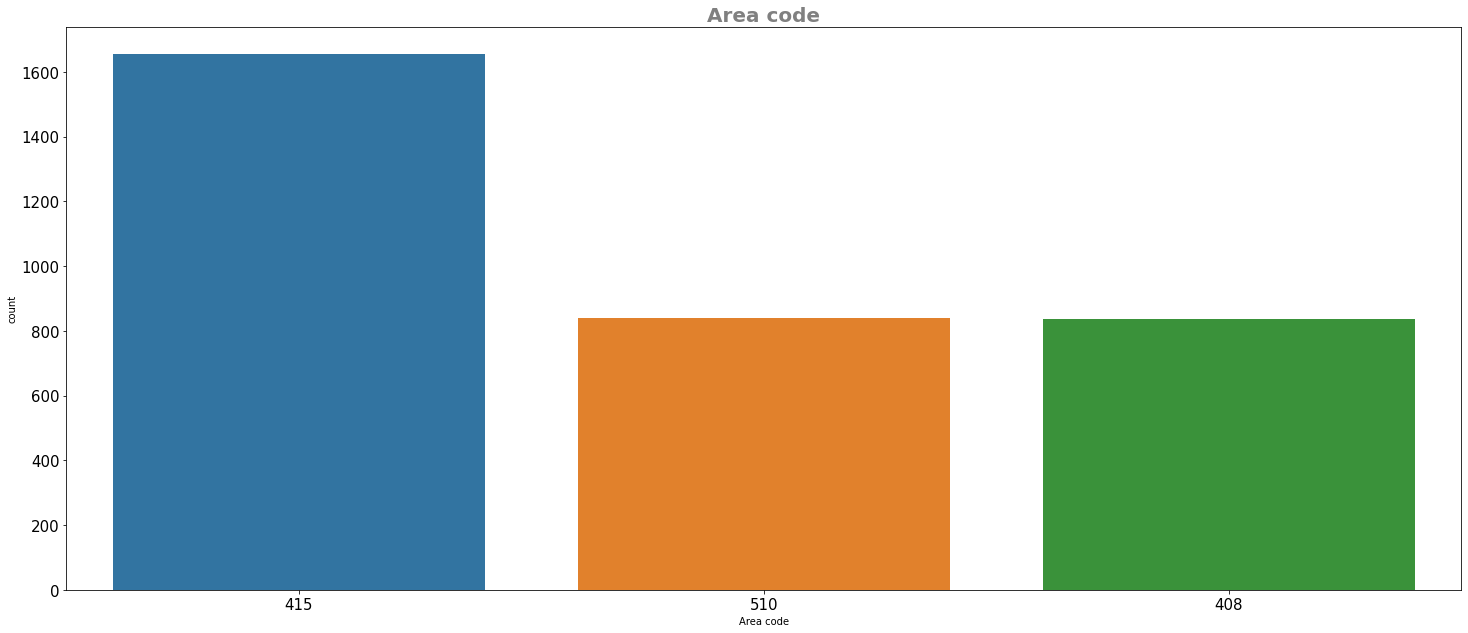

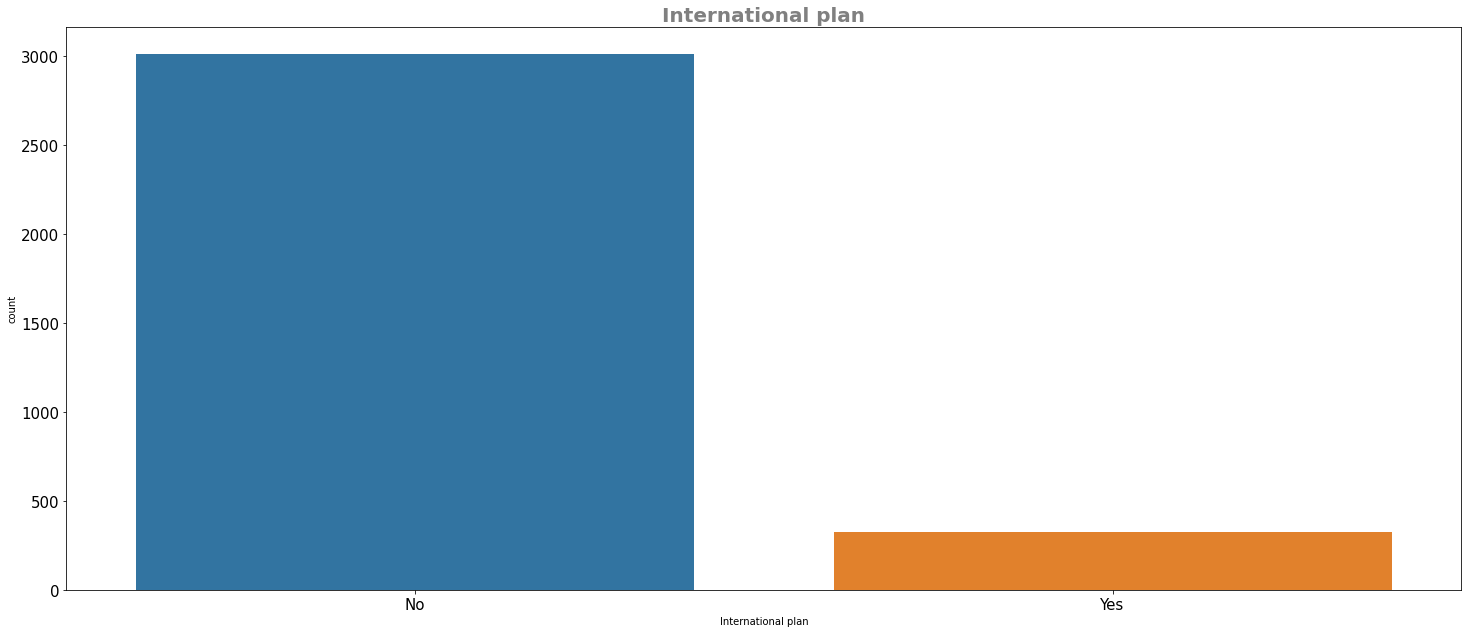

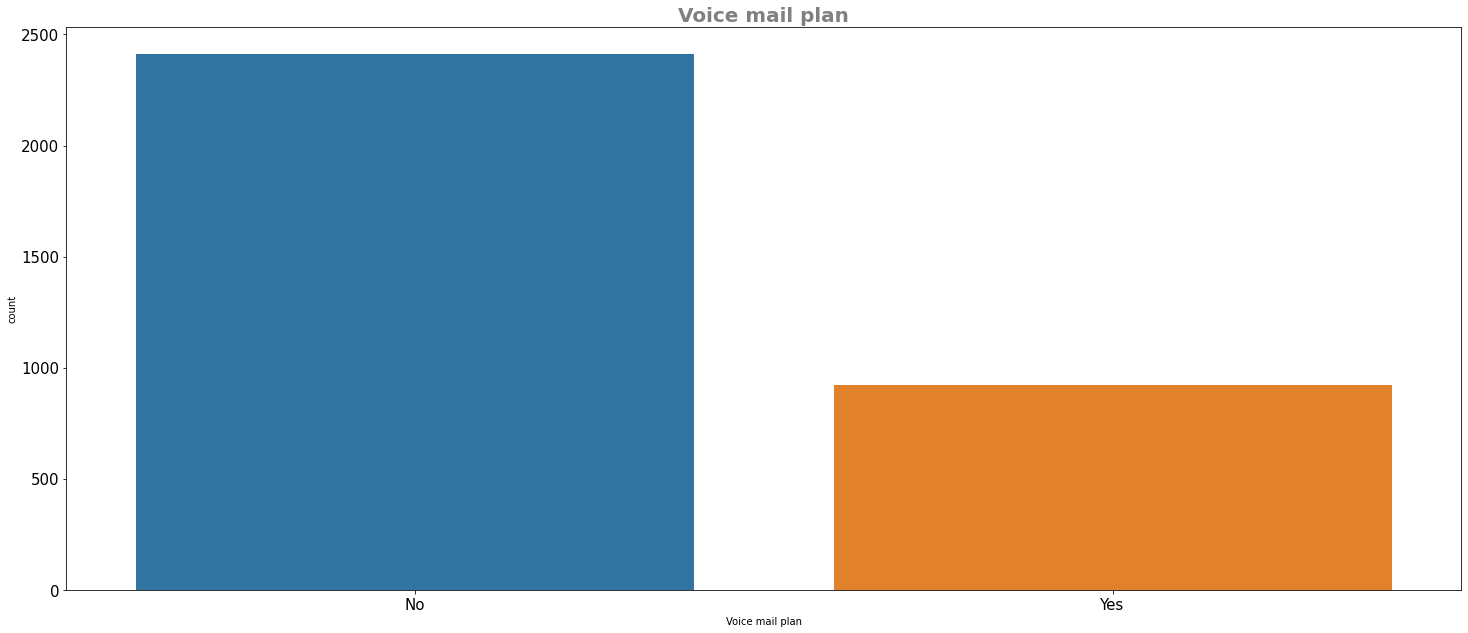

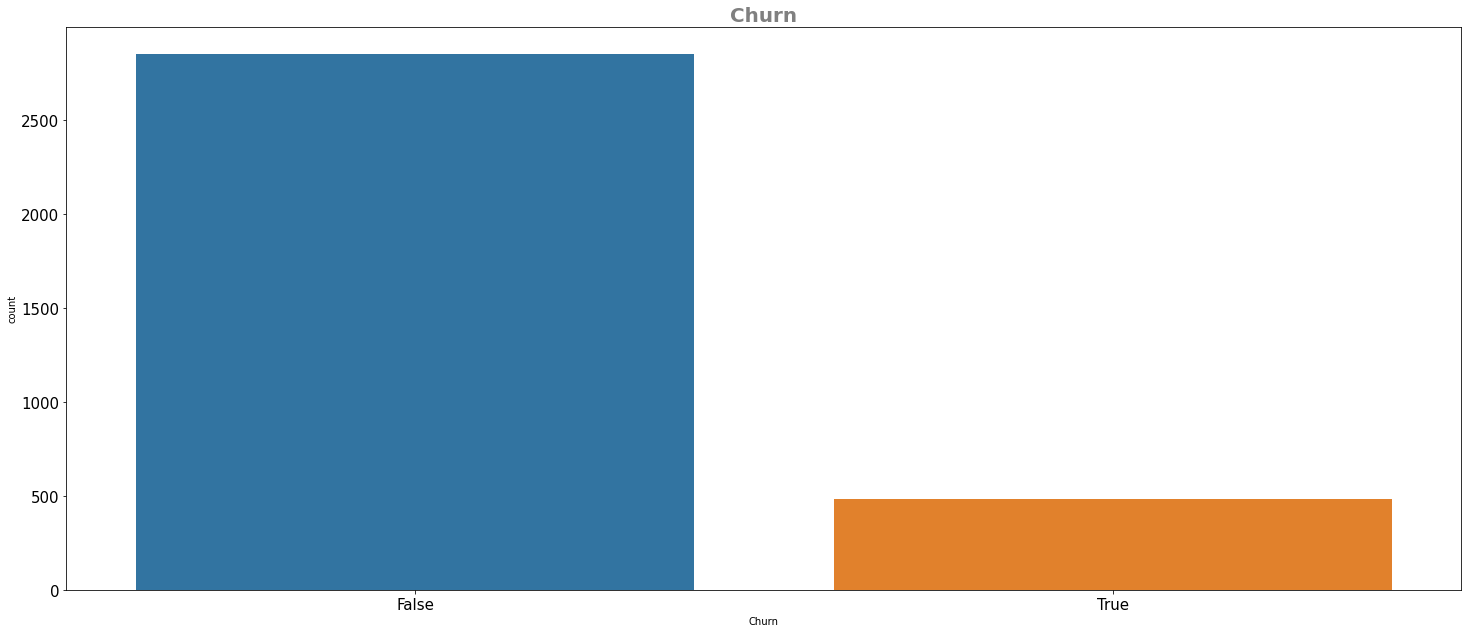

In [ ]:
#Creating countplot of all categorical variables
i=0
for col in cat:
  i=i+1
  plt.figure(figsize= (25,60))
  plt.subplot(5,1,i)
  sns.countplot(x=df_tc[col],order = df_tc[col].value_counts().index)
  plt.title(col,fontsize=20,fontweight=1000,color='Grey')
  plt.rc('xtick',labelsize=15)
  plt.rc('ytick',labelsize=15)
  plt.show()

### **Bivariate Analysis**

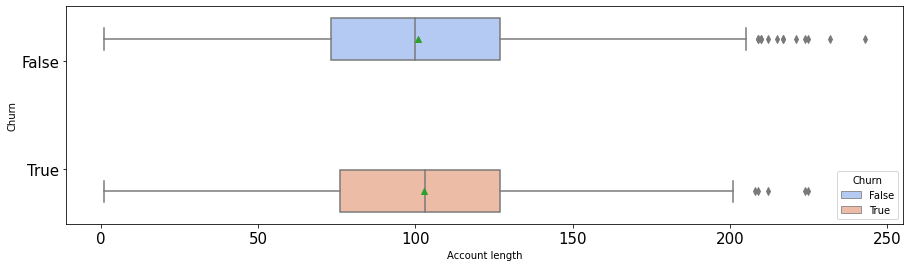

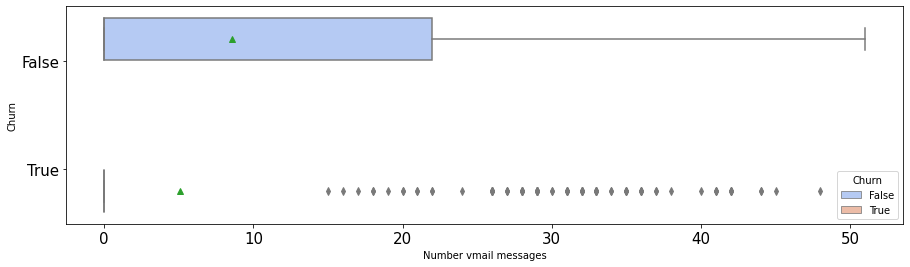

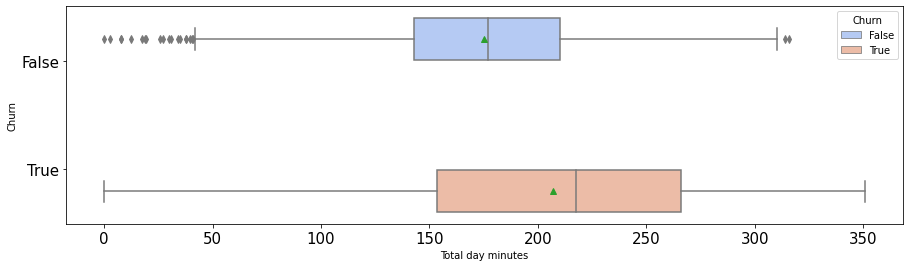

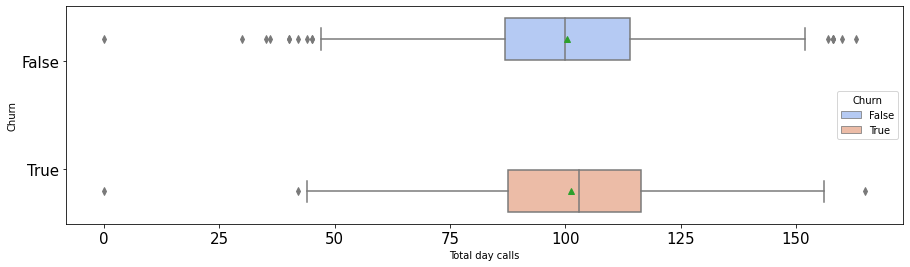

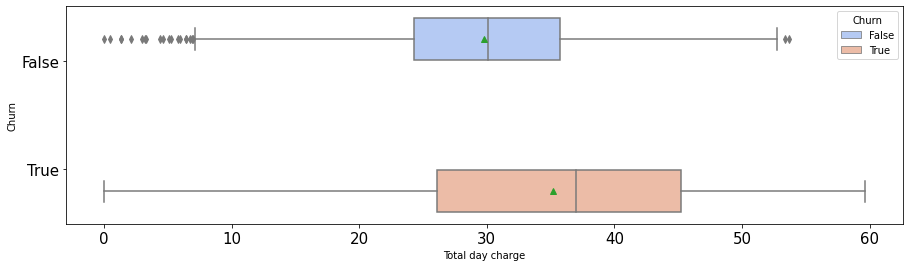

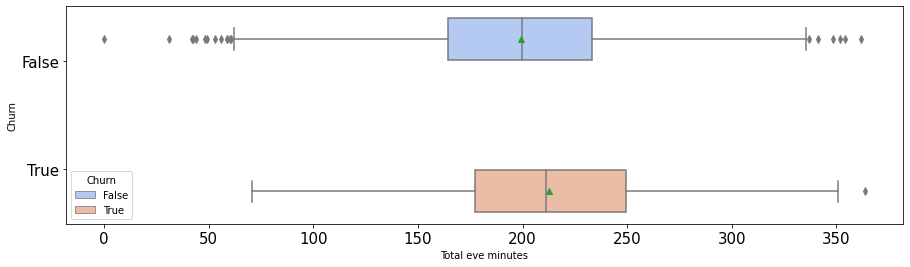

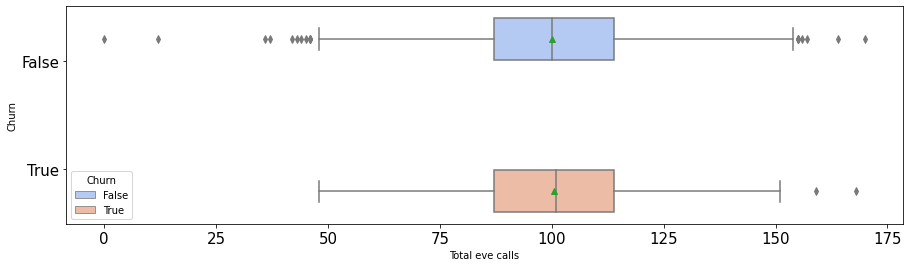

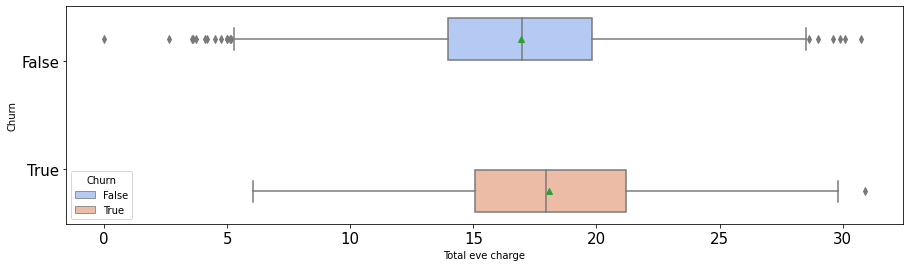

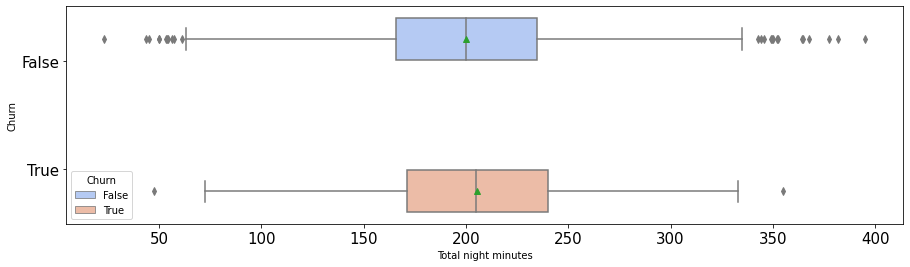

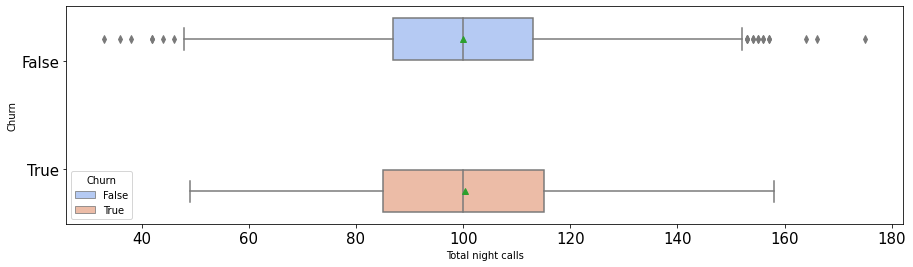

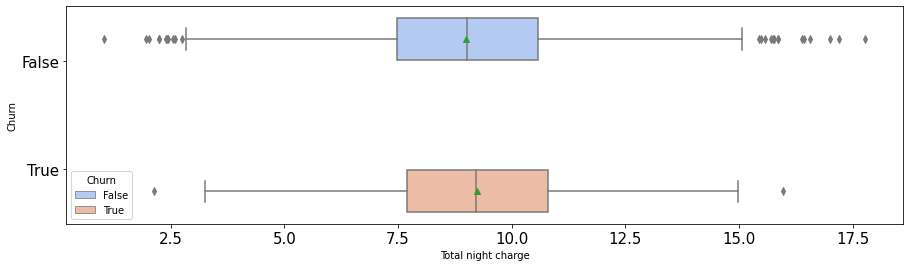

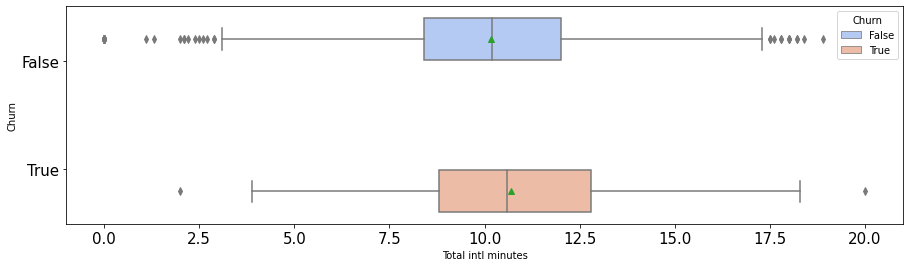

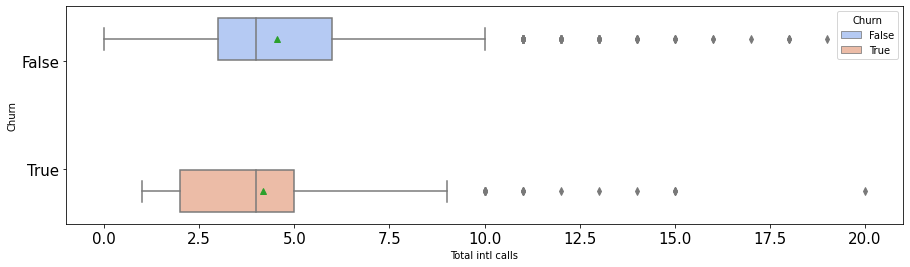

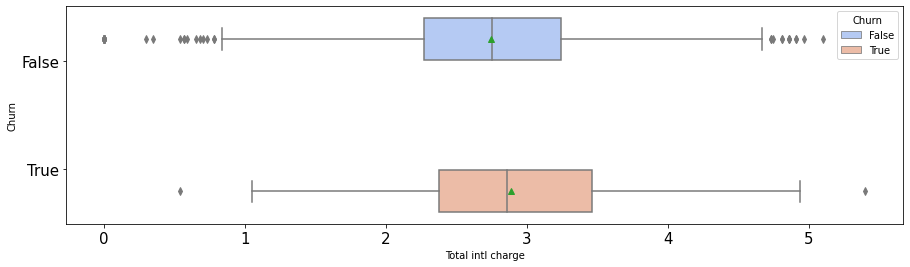

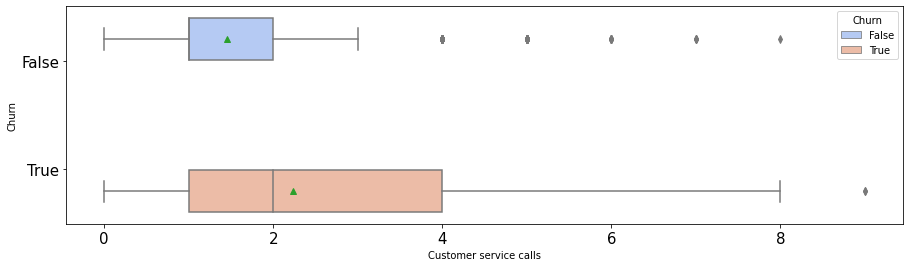

In [ ]:
# box plot with respect to the target variable churn
for i in df_tc[num].columns:
    plt.figure(figsize=(15,4))
    sns.boxplot(x=df_tc[i],y=df_tc["Churn"],orient='h',hue=df_tc['Churn'],palette='coolwarm',showmeans=True);
    plt.show()

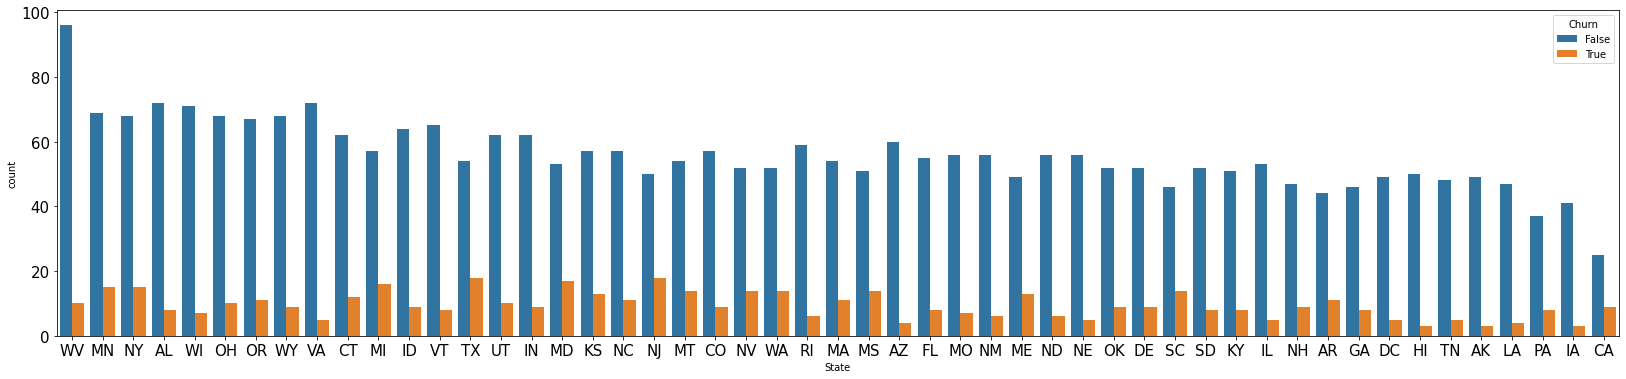

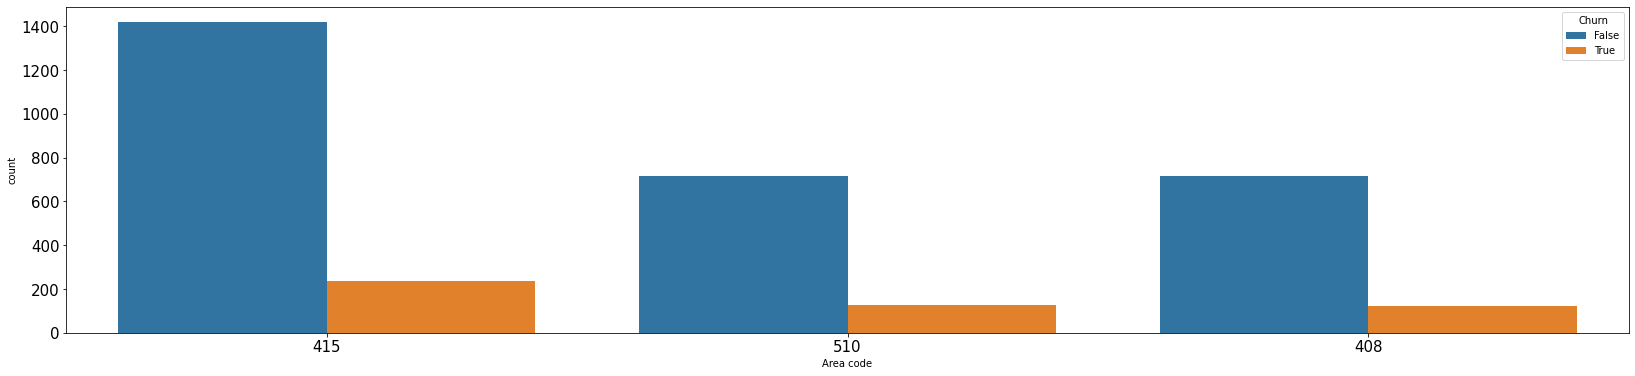

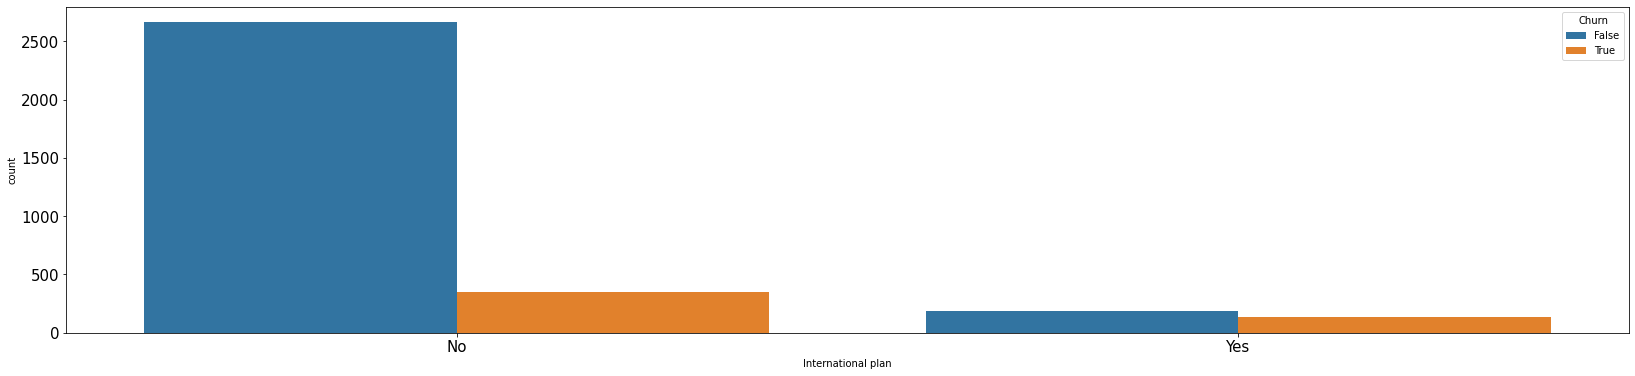

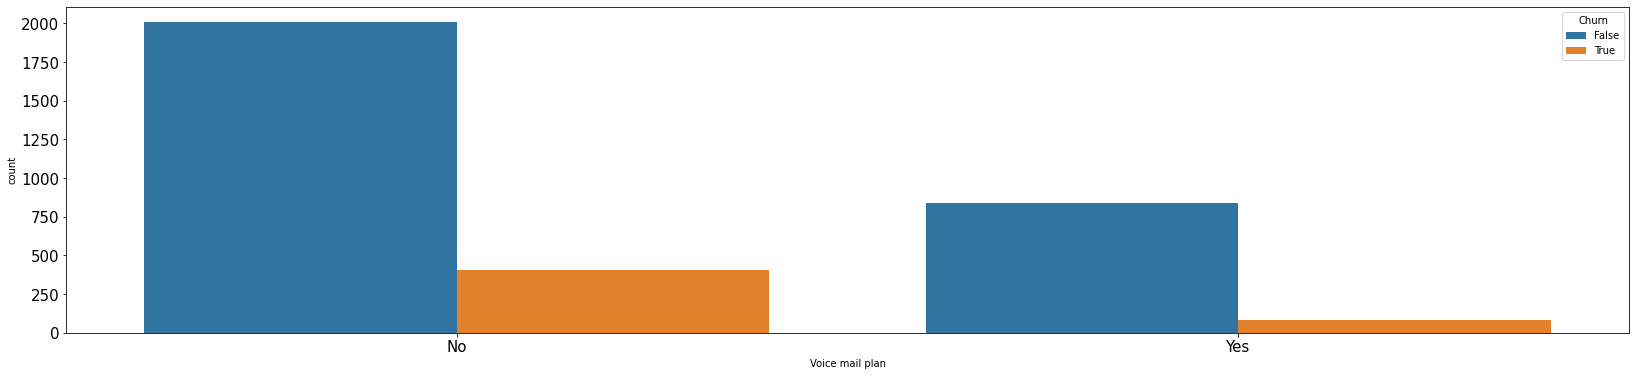

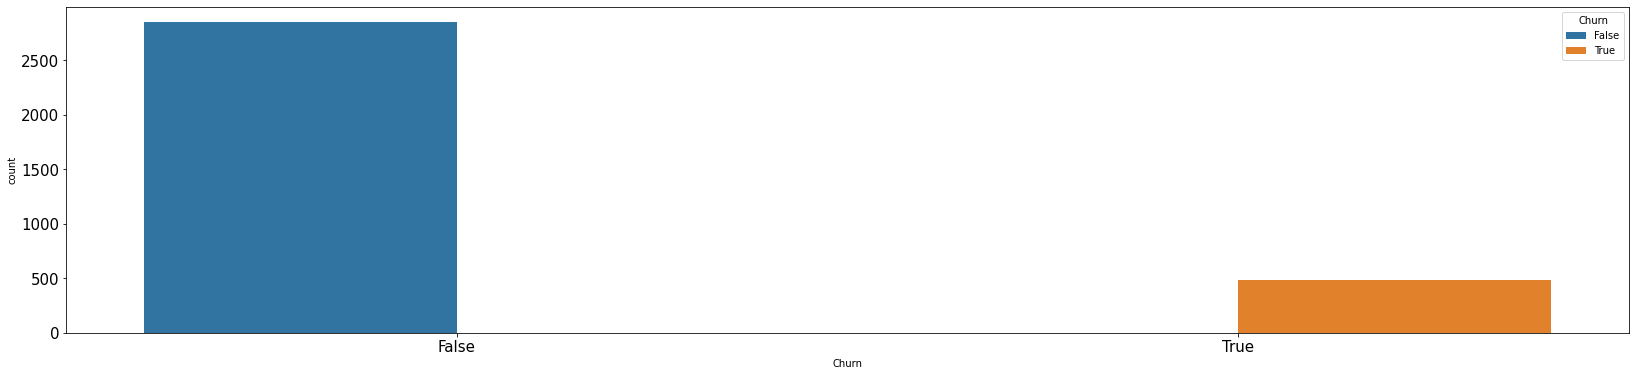

In [ ]:
#creating countplot with respect to Target variable 'Churn'
for column in df_tc[cat].columns:
    plt.figure(figsize=(28,6));
    sns.countplot(x=column, hue='Churn', data=df_tc,order = df_tc[column].value_counts().index);

In [ ]:
corr = df_tc.corr()
corr

Account length  Number vmail messages  \
Account length                    1.00                  -0.00   
Number vmail messages            -0.00                   1.00   
Total day minutes                 0.01                   0.00   
Total day calls                   0.04                  -0.01   
Total day charge                  0.01                   0.00   
Total eve minutes                -0.01                   0.02   
Total eve calls                   0.02                  -0.01   
Total eve charge                 -0.01                   0.02   
Total night minutes              -0.01                   0.01   
Total night calls                -0.01                   0.01   
Total night charge               -0.01                   0.01   
Total intl minutes                0.01                   0.00   
Total intl calls                  0.02                   0.01   
Total intl charge                 0.01                   0.00   
Customer service calls           -0.00                  -0.01   
Churn                             0.02                  -0.09   

                        Total day minutes  Total day calls  Total day charge  \
Account length                       0.01             0.04              0.01   
Number vmail messages                0.00            -0.01              0.00   
Total day minutes                    1.00             0.01              1.00   
Total day calls                      0.01             1.00              0.01   
Total day charge                     1.00             0.01              1.00   
Total eve minutes                    0.01            -0.02              0.01   
Total eve calls                      0.02             0.01              0.02   
Total eve charge                     0.01            -0.02              0.01   
Total night minutes                  0.00             0.02              0.00   
Total night calls                    0.02            -0.02              0.02   
Total night charge                   0.00             0.02              0.00   
Total intl minutes                  -0.01             0.02             -0.01   
Total intl calls                     0.01             0.00              0.01   
Total intl charge                   -0.01             0.02             -0.01   
Customer service calls              -0.01            -0.02             -0.01   
Churn                                0.21             0.02              0.21   

                        Total eve minutes  Total eve calls  Total eve charge  \
Account length                      -0.01             0.02             -0.01   
Number vmail messages                0.02            -0.01              0.02   
Total day minutes                    0.01             0.02              0.01   
Total day calls                     -0.02             0.01             -0.02   
Total day charge                     0.01             0.02              0.01   
Total eve minutes                    1.00            -0.01              1.00   
Total eve calls                     -0.01             1.00             -0.01   
Total eve charge                     1.00            -0.01              1.00   
Total night minutes                 -0.01            -0.00             -0.01   
Total night calls                    0.01             0.01              0.01   
Total night charge                  -0.01            -0.00             -0.01   
Total intl minutes                  -0.01             0.01             -0.01   
Total intl calls                     0.00             0.02              0.00   
Total intl charge                   -0.01             0.01             -0.01   
Customer service calls              -0.01             0.00             -0.01   
Churn                                0.09             0.01              0.09   

                        Total night minutes  Total night calls  \
Account length                        -0.01              -0.01   
Number vmail messages                  0.01               0.01  

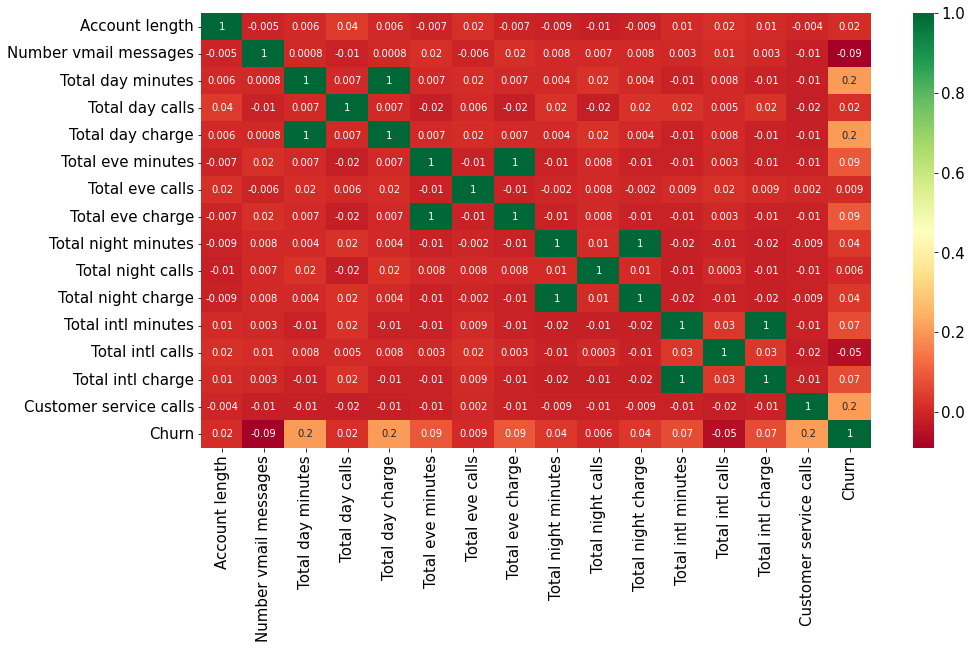

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,fmt='.1g',cmap='RdYlGn')

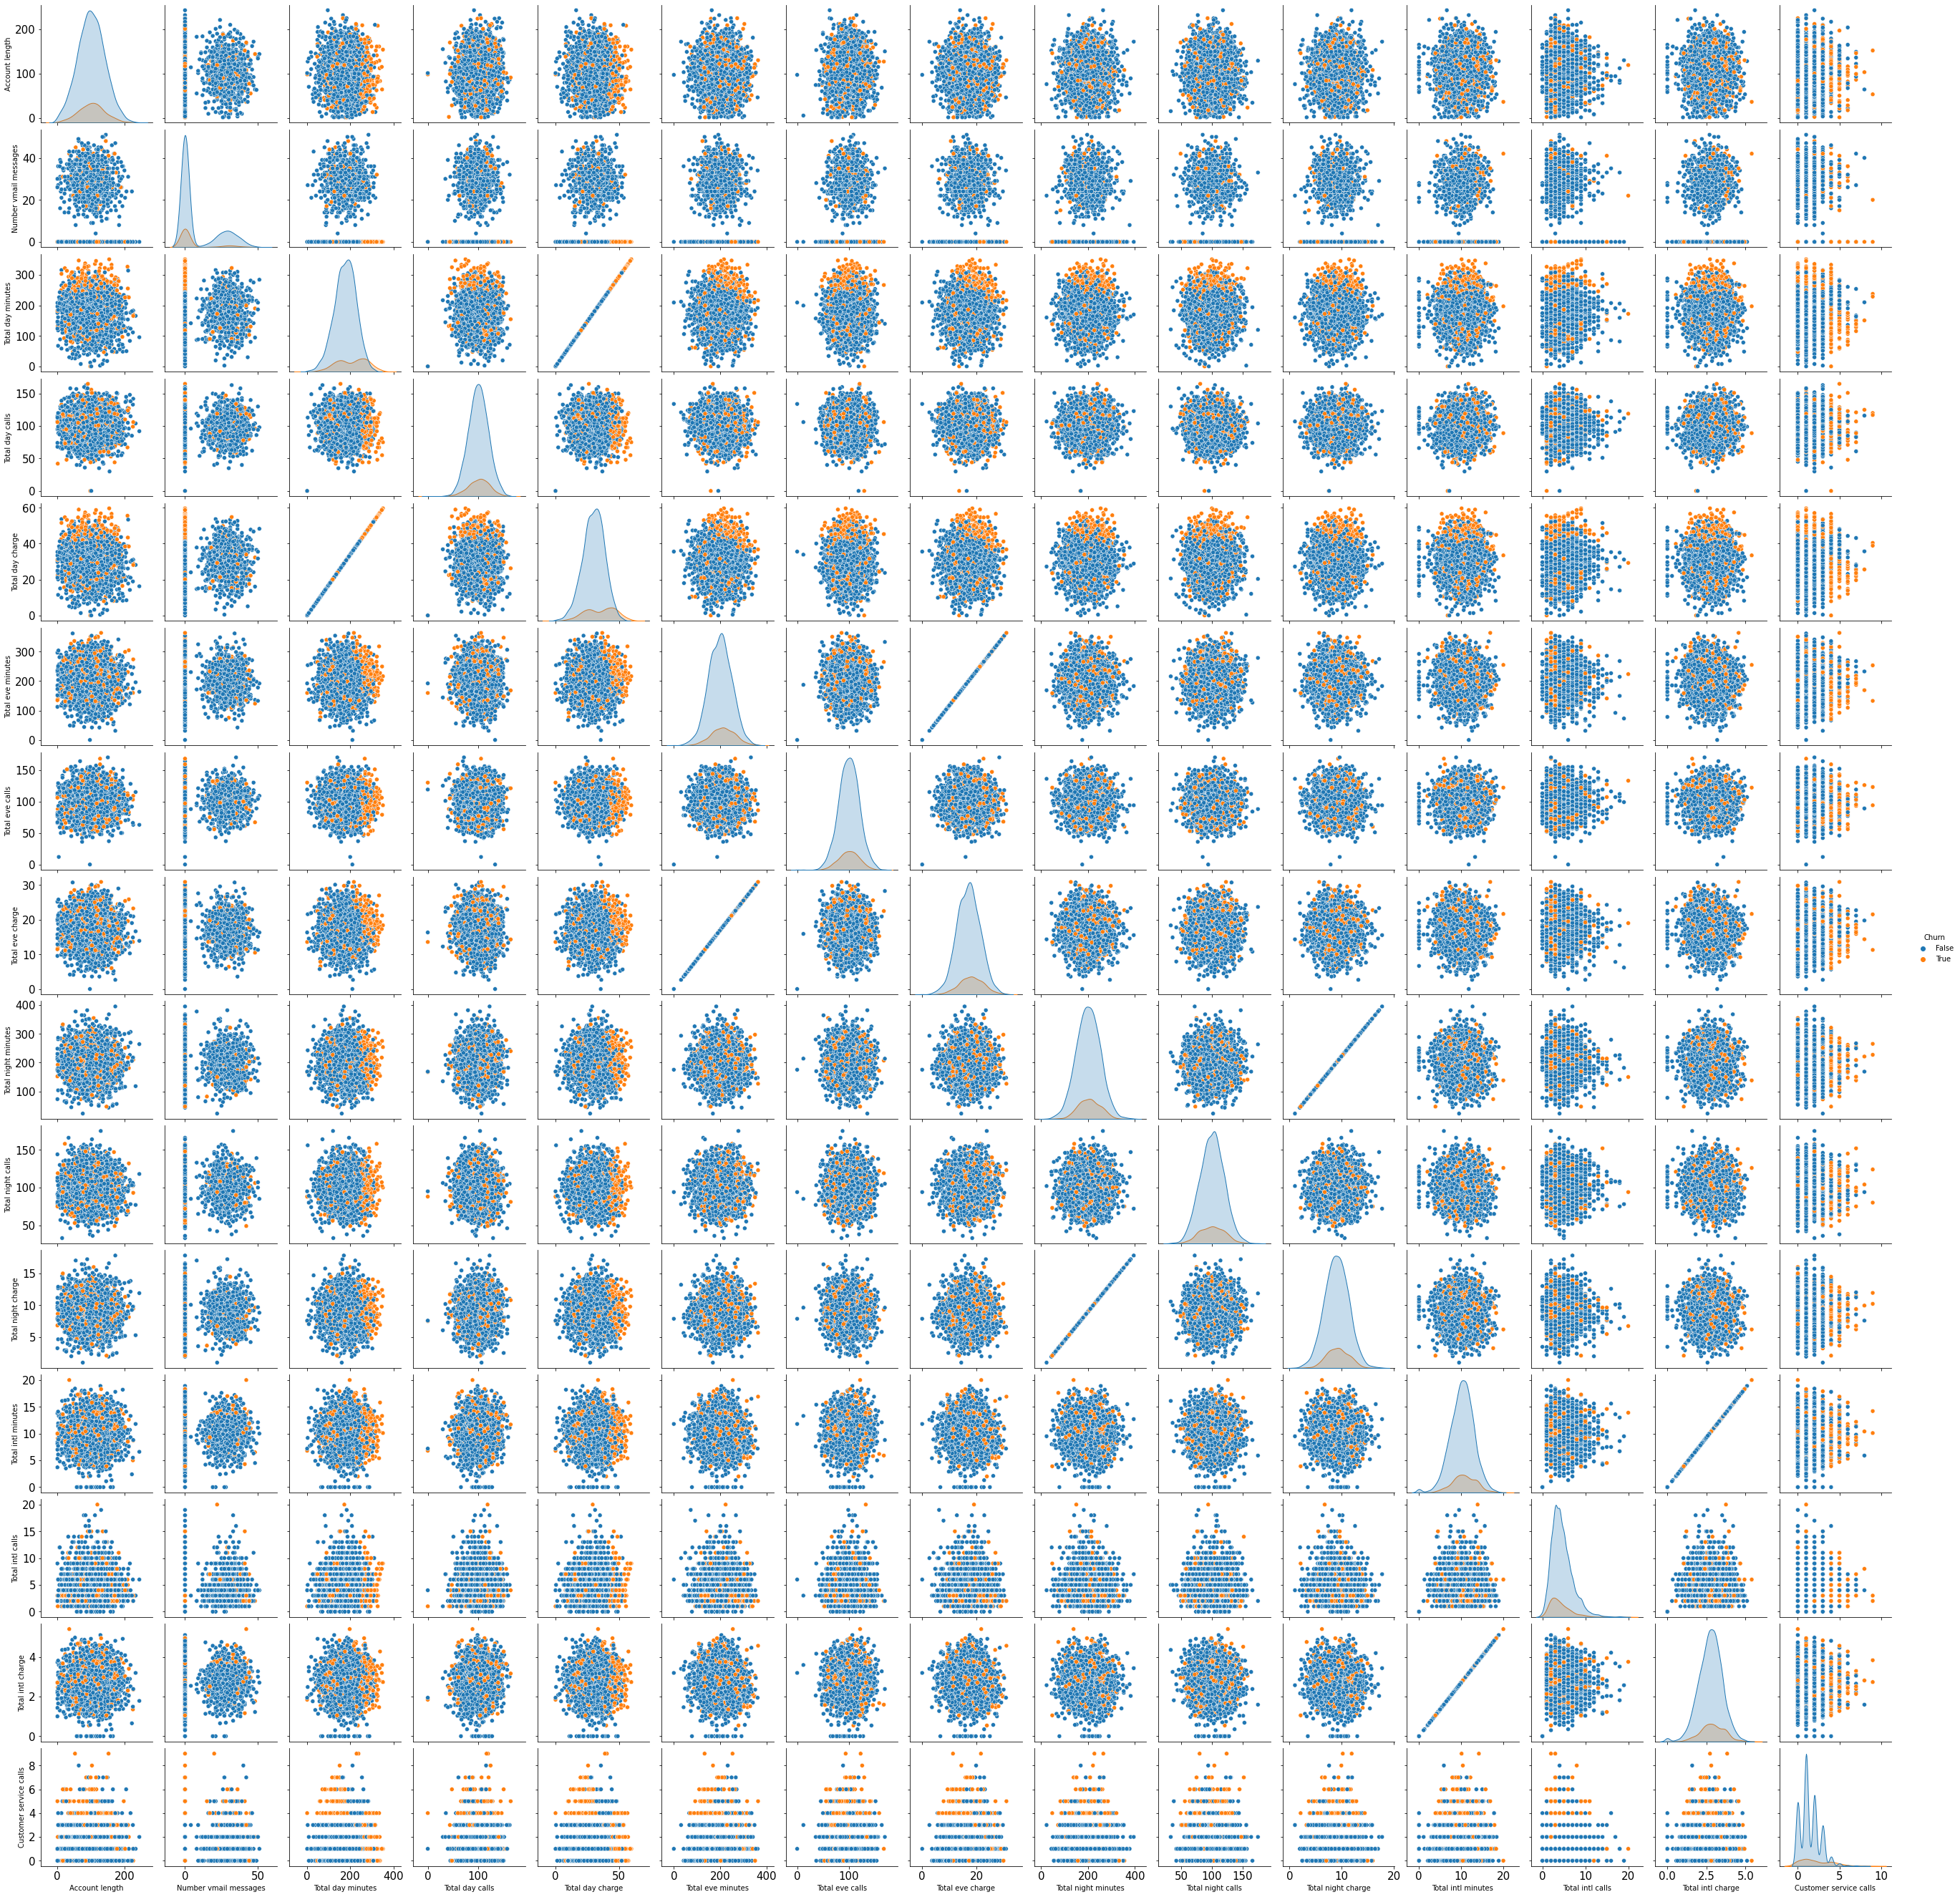

In [ ]:
#Creating a dataframe to store numerical variables, as pairplot can be created only for numerical variables
dfpair=df_tc[num]
dfpair['Churn']=df_tc['Churn']
sns.pairplot(dfpair,hue='Churn');